# FINAL MODULE PROJECT - GROUP 5

## Predict genetic disorders from dataset

In [1]:
import pandas as pd
import numpy as np

import os
print(os.listdir("./"))

['trabajo_borjita.ipynb', '.gitignore', '.ipynb_checkpoints', 'resources', 'pathology_prediction.py', 'data', '.git', 'Notebook _G5_Project_mig.ipynb', 'explicacion_cols.pdf', 'train_genetic_disorders.csv', 'README.md', 'PROJECT.md', 'notebook-ml-1.ipynb', 'DATASETS.md', 'Notebook _G5_Project.ipynb']


In [2]:
data = pd.read_csv('./train_genetic_disorders.csv')
data.head()
print("Dataset size: ", data.shape)

Dataset size:  (22083, 45)


In [3]:
data[data.isnull().all(1)].shape
print("Null rows_train:",data[data.isnull().all(1)].shape[0])

data=data[data.isnull().all(1)!=True]
data.shape

Null rows_train: 1072


(21011, 45)

In [4]:
print(data.apply(lambda col: col.unique()))

Patient Id                                          [PID0x6418, PID0x25d5, PID0x4a82, PID0x4ac8, P...
Patient Age                                         [2.0, 4.0, 6.0, 12.0, 11.0, 14.0, 3.0, 7.0, 1....
Genes in mother's side                                                                      [Yes, No]
Inherited from father                                                                  [No, Yes, nan]
Maternal gene                                                                          [Yes, No, nan]
Paternal gene                                                                               [No, Yes]
Blood cell count (mcL)                              [4.760603086, 4.91066906, 4.893297428, 4.70528...
Patient First Name                                  [Richard, Mike, Kimberly, Jeffery, Johanna, Ma...
Family Name                                         [nan, Hoelscher, Stutzman, Bryant, Camacho, Sa...
Father's name                                       [Larre, Brycen, Nashon, Aayaan

In [5]:
data.columns = data.columns.str.replace('\'','')
data.drop(columns=['Patient Id', 'Patient First Name', 'Family Name', 'Fathers name',
        'Institute Name', 'Location of Institute', 'Parental consent',
        'Place of birth', 'Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5'], axis=1, inplace=True)

In [6]:
print("Dataset size: ", data.shape)
print('\n', '**'* 50, '\n')
data.info()
print('\n', '**'* 50, '\n')
data.describe(include = 'all')

Dataset size:  (21011, 32)

 **************************************************************************************************** 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21011 entries, 0 to 21010
Data columns (total 32 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       19643 non-null  float64
 1   Genes in mothers side                             21011 non-null  object 
 2   Inherited from father                             20724 non-null  object 
 3   Maternal gene                                     18317 non-null  object 
 4   Paternal gene                                     21011 non-null  object 
 5   Blood cell count (mcL)                            21011 non-null  float64
 6   Mothers age                                       15293 non-null  float64
 7   Fathers age                                

,Patient Age,Genes in mothers side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mothers age,Fathers age,Status,Respiratory Rate (breaths/min),...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
count,19643.000000,21011,20724,18317,21011,21011.000000,15293.000000,15322.000000,21011,18952,...,18959,18965.000000,18977,18955.000000,18899.000000,19008.000000,18987.000000,18956.000000,18962,18943
unique,NaN,2,2,2,2,NaN,NaN,NaN,2,2,...,2,NaN,4,NaN,NaN,NaN,NaN,NaN,3,9
top,NaN,Yes,No,Yes,No,NaN,NaN,NaN,Alive,Normal (30-60),...,Singular,NaN,slightly abnormal,NaN,NaN,NaN,NaN,NaN,Mitochondrial genetic inheritance disorders,Leigh syndrome
freq,NaN,12509,12508,10125,11887,NaN,NaN,NaN,10572,9595,...,9509,NaN,4855,NaN,NaN,NaN,NaN,NaN,9686,4893
mean,6.974851,NaN,NaN,NaN,NaN,4.899004,34.522527,41.942436,NaN,NaN,...,NaN,7.484680,NaN,0.592034,0.552886,0.537405,0.497393,0.460804,NaN,NaN
std,4.322584,NaN,NaN,NaN,NaN,0.199829,9.847256,13.027701,NaN,NaN,...,NaN,2.653633,NaN,0.491470,0.497208,0.498612,0.500006,0.498474,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,4.092727,18.000000,20.000000,NaN,NaN,...,NaN,3.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,3.000000,NaN,NaN,NaN,NaN,4.763230,26.000000,31.000000,NaN,NaN,...,NaN,5.419026,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,7.000000,NaN,NaN,NaN,NaN,4.899548,35.000000,42.000000,NaN,NaN,...,NaN,7.473071,NaN,1.000000,1.000000,1.000000,0.000000,0.000000,NaN,NaN
75%,11.000000,NaN,NaN,NaN,NaN,5.033977,43.000000,53.000000,NaN,NaN,...,NaN,9.528684,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN


In [7]:
data.isnull().sum()

Patient Age                                         1368
Genes in mothers side                                  0
Inherited from father                                287
Maternal gene                                       2694
Paternal gene                                          0
Blood cell count (mcL)                                 0
Mothers age                                         5718
Fathers age                                         5689
Status                                                 0
Respiratory Rate (breaths/min)                      2059
Heart Rate (rates/min                               2025
Follow-up                                           2070
Gender                                              2063
Birth asphyxia                                      2058
Autopsy shows birth defect (if applicable)           966
Folic acid details (peri-conceptional)              2013
H/O serious maternal illness                        2052
H/O radiation exposure (x-ray) 

In [8]:
# Removing those from genetic disorder which are null
data['Genetic Disorder'].replace('', np.nan, inplace=True)
data.dropna(subset=['Genetic Disorder'], inplace=True)
data.isnull().sum()

Patient Age                                         1174
Genes in mothers side                                  0
Inherited from father                                246
Maternal gene                                       2326
Paternal gene                                          0
Blood cell count (mcL)                                 0
Mothers age                                         4921
Fathers age                                         4903
Status                                                 0
Respiratory Rate (breaths/min)                      1750
Heart Rate (rates/min                               1730
Follow-up                                           1786
Gender                                              1752
Birth asphyxia                                      1780
Autopsy shows birth defect (if applicable)           814
Folic acid details (peri-conceptional)              1733
H/O serious maternal illness                        1739
H/O radiation exposure (x-ray) 

In [9]:
# removing multifactor genetic disorder for two categories
data['Genetic Disorder'].replace('Multifactorial genetic inheritance disorders', np.nan, inplace=True)
data.dropna(subset=['Genetic Disorder'], inplace=True)
print('Número de muestras por clase:')
print(data["Genetic Disorder"].value_counts())

Número de muestras por clase:
Mitochondrial genetic inheritance disorders    9686
Single-gene inheritance diseases               7291
Name: Genetic Disorder, dtype: int64


In [10]:
data = data.rename(columns={"Genes in mother's side":'defective_mother',
                    'Inherited from father':'defective_father',
                    'Maternal gene':'maternal_gene','Paternal gene':'paternal_gene',
                    'Respiratory Rate (breaths/min)':'respiratory_rate','Heart Rate (rates/min':'heart_rate',
                    'Parental consent':'parental_consent','Follow-up':'follow_up','Birth asphyxia':'birth_asphyxia',
                    'Autopsy shows birth defect (if applicable)':'birth_defect_autopsy','Place of birth':'birth_place',
                    'Folic acid details (peri-conceptional)':'folic_acid_periconceptional',
                    'H/O serious maternal illness':'maternal_illness','H/O radiation exposure (x-ray)':'radiation_exposure',
                    'H/O substance abuse':'substance_abuse','Assisted conception IVF/ART':'assisted_conception',
                    'History of anomalies in previous pregnancies':'previous_pregnancy_anomalies',
                    'Birth defects':'birth_defects','Blood test result':'blood_test_result','Genetic Disorder':'genetic_disorder',
                    'Disorder Subclass':'disorder_subclass','Patient Age':'patient_age','Blood cell count (mcL)':'blood_cell_count',
                    "Mother's age":'mother_age',"Father's age":'father_age','No. of previous abortion':'num_previous_abortion',
                    'White Blood cell count (thousand per microliter)':'WBC_count'})

In [11]:
# Data cleaning from predict_genetic_disorder notebook in Kaggle
data=data.replace('-99',np.nan)
data['radiation_exposure']=data['radiation_exposure'].replace('-','others')
data['substance_abuse']=data['substance_abuse'].replace('-','others')
data['radiation_exposure']=data['radiation_exposure'].replace('-','others')
data['substance_abuse']=data['substance_abuse'].replace('-','others')
data['WBC_count']=data['WBC_count'].mask(data['WBC_count']<0,np.nan)
data['num_previous_abortion']=data['num_previous_abortion'].mask(data['num_previous_abortion']<0,np.nan)

In [12]:
data.head()

,patient_age,Genes in mothers side,defective_father,maternal_gene,paternal_gene,blood_cell_count,Mothers age,Fathers age,Status,respiratory_rate,...,birth_defects,WBC_count,blood_test_result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,genetic_disorder,disorder_subclass
0,2.0,Yes,No,Yes,No,4.760603,NaN,NaN,Alive,Normal (30-60),...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
3,12.0,Yes,No,Yes,No,4.705280,21.0,NaN,Deceased,Tachypnea,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
5,14.0,Yes,No,Yes,No,5.103188,NaN,NaN,Deceased,NaN,...,Multiple,10.272230,normal,1.0,0.0,0.0,1.0,0.0,Single-gene inheritance diseases,Cystic fibrosis
6,3.0,Yes,No,Yes,Yes,4.901080,NaN,63.0,Alive,Normal (30-60),...,Multiple,6.825974,normal,0.0,0.0,0.0,0.0,0.0,Single-gene inheritance diseases,Tay-Sachs
7,3.0,No,No,Yes,Yes,4.964816,40.0,NaN,Alive,Tachypnea,...,Singular,9.836351,inconclusive,0.0,0.0,1.0,NaN,0.0,Single-gene inheritance diseases,Tay-Sachs


In [13]:
# Missing value imputation from predict_genetic_disorder notebook in Kaggle
from sklearn.impute import SimpleImputer
imp_mode=SimpleImputer(strategy='most_frequent')
imp_mode_num=SimpleImputer(strategy='most_frequent')
imp_median=SimpleImputer(strategy='median')

pd.options.mode.chained_assignment = None

for i in data.columns:
    if (data[i].dtype.name!='object')&(data[i].nunique()<=3):
        imp_mode_num.fit(np.array(data[i]).reshape(-1,1))
        data[i]=imp_mode_num.transform(np.array(data[i]).reshape(-1,1))

    elif (data[i].dtype.name!='object')&(data[i].nunique()>3):
        imp_median.fit(np.array(data[i]).reshape(-1,1))
        data[i]=imp_median.transform(np.array(data[i]).reshape(-1,1))
    else:
        imp_mode.fit(np.array(data[i]).reshape(-1,1))
        data[i]=imp_mode.transform(np.array(data[i]).reshape(-1,1))

In [14]:
data.isnull().sum()

patient_age                     0
Genes in mothers side           0
defective_father                0
maternal_gene                   0
paternal_gene                   0
blood_cell_count                0
Mothers age                     0
Fathers age                     0
Status                          0
respiratory_rate                0
heart_rate                      0
follow_up                       0
Gender                          0
birth_asphyxia                  0
birth_defect_autopsy            0
folic_acid_periconceptional     0
maternal_illness                0
radiation_exposure              0
substance_abuse                 0
assisted_conception             0
previous_pregnancy_anomalies    0
num_previous_abortion           0
birth_defects                   0
WBC_count                       0
blood_test_result               0
Symptom 1                       0
Symptom 2                       0
Symptom 3                       0
Symptom 4                       0
Symptom 5     

In [15]:
print(data.shape)
print()
print(data.apply(lambda col: col.unique()))
print(data["respiratory_rate"].value_counts())

(16977, 32)

patient_age                     [2.0, 12.0, 14.0, 3.0, 11.0, 6.0, 7.0, 1.0, 0....
Genes in mothers side                                                   [Yes, No]
defective_father                                                        [No, Yes]
maternal_gene                                                           [Yes, No]
paternal_gene                                                           [No, Yes]
blood_cell_count                [4.760603086, 4.705280392, 5.103188441, 4.9010...
Mothers age                     [35.0, 21.0, 40.0, 45.0, 50.0, 41.0, 30.0, 24....
Fathers age                     [42.0, 63.0, 44.0, 56.0, 20.0, 24.0, 57.0, 48....
Status                                                          [Alive, Deceased]
respiratory_rate                                      [Normal (30-60), Tachypnea]
heart_rate                                                  [Normal, Tachycardia]
follow_up                                                             [High, Low]
Gen

In [16]:
print('Número de muestras por clase:')
print(data["genetic_disorder"].value_counts())

Número de muestras por clase:
Mitochondrial genetic inheritance disorders    9686
Single-gene inheritance diseases               7291
Name: genetic_disorder, dtype: int64


<AxesSubplot:xlabel='genetic_disorder', ylabel='count'>

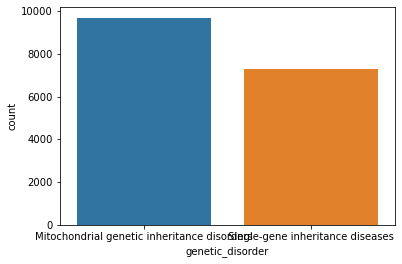

In [17]:
import seaborn as sns # buscar manera 
sns.countplot(data=data, x='genetic_disorder')

In [18]:
# see what we've got
print(data.columns)

Index(['patient_age', 'Genes in mothers side', 'defective_father',
       'maternal_gene', 'paternal_gene', 'blood_cell_count', 'Mothers age',
       'Fathers age', 'Status', 'respiratory_rate', 'heart_rate', 'follow_up',
       'Gender', 'birth_asphyxia', 'birth_defect_autopsy',
       'folic_acid_periconceptional', 'maternal_illness', 'radiation_exposure',
       'substance_abuse', 'assisted_conception',
       'previous_pregnancy_anomalies', 'num_previous_abortion',
       'birth_defects', 'WBC_count', 'blood_test_result', 'Symptom 1',
       'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5', 'genetic_disorder',
       'disorder_subclass'],
      dtype='object')


In [19]:
print(data.apply(lambda col: col.unique()))

patient_age                     [2.0, 12.0, 14.0, 3.0, 11.0, 6.0, 7.0, 1.0, 0....
Genes in mothers side                                                   [Yes, No]
defective_father                                                        [No, Yes]
maternal_gene                                                           [Yes, No]
paternal_gene                                                           [No, Yes]
blood_cell_count                [4.760603086, 4.705280392, 5.103188441, 4.9010...
Mothers age                     [35.0, 21.0, 40.0, 45.0, 50.0, 41.0, 30.0, 24....
Fathers age                     [42.0, 63.0, 44.0, 56.0, 20.0, 24.0, 57.0, 48....
Status                                                          [Alive, Deceased]
respiratory_rate                                      [Normal (30-60), Tachypnea]
heart_rate                                                  [Normal, Tachycardia]
follow_up                                                             [High, Low]
Gender          

In [20]:
# now lets see a lil header and change Yes and No values to binary
data.head()
data.columns = data.columns.str.replace('\'','')
data = data.replace(['No', 'Yes'], ["0", "1"])
data.head()

,patient_age,Genes in mothers side,defective_father,maternal_gene,paternal_gene,blood_cell_count,Mothers age,Fathers age,Status,respiratory_rate,...,birth_defects,WBC_count,blood_test_result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,genetic_disorder,disorder_subclass
0,2.0,1,0,1,0,4.760603,35.0,42.0,Alive,Normal (30-60),...,Multiple,9.857562,slightly abnormal,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
3,12.0,1,0,1,0,4.705280,21.0,42.0,Deceased,Tachypnea,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
5,14.0,1,0,1,0,5.103188,35.0,42.0,Deceased,Normal (30-60),...,Multiple,10.272230,normal,1.0,0.0,0.0,1.0,0.0,Single-gene inheritance diseases,Cystic fibrosis
6,3.0,1,0,1,1,4.901080,35.0,63.0,Alive,Normal (30-60),...,Multiple,6.825974,normal,0.0,0.0,0.0,0.0,0.0,Single-gene inheritance diseases,Tay-Sachs
7,3.0,0,0,1,1,4.964816,40.0,42.0,Alive,Tachypnea,...,Singular,9.836351,inconclusive,0.0,0.0,1.0,0.0,0.0,Single-gene inheritance diseases,Tay-Sachs


In [21]:
print(data.apply(lambda col: col.unique()))

patient_age                     [2.0, 12.0, 14.0, 3.0, 11.0, 6.0, 7.0, 1.0, 0....
Genes in mothers side                                                      [1, 0]
defective_father                                                           [0, 1]
maternal_gene                                                              [1, 0]
paternal_gene                                                              [0, 1]
blood_cell_count                [4.760603086, 4.705280392, 5.103188441, 4.9010...
Mothers age                     [35.0, 21.0, 40.0, 45.0, 50.0, 41.0, 30.0, 24....
Fathers age                     [42.0, 63.0, 44.0, 56.0, 20.0, 24.0, 57.0, 48....
Status                                                          [Alive, Deceased]
respiratory_rate                                      [Normal (30-60), Tachypnea]
heart_rate                                                  [Normal, Tachycardia]
follow_up                                                             [High, Low]
Gender          

In [22]:
# now lets check what we have left
# and lets change columns status, follow-up and birth defects.
def replaceduplets(column, value1, value2, to1, to2):
        data[column] = data[column].replace([value1, value2], [to1, to2])

replaceduplets('Status', 'Alive', 'Deceased', "1", "0")
replaceduplets('heart_rate', 'Tachycardia', 'Normal', "0", "1")
replaceduplets('follow_up', 'Low', 'High', "0", "1")
replaceduplets('birth_defects', 'Multiple', 'Singular', "0", "1")
replaceduplets('respiratory_rate', 'Tachypnea', 'Normal (30-60)', "0", "1")
replaceduplets('genetic_disorder', 'Mitochondrial genetic inheritance disorders',
               'Single-gene inheritance diseases', "M", "S")

print(data.apply(lambda col: col.unique()))

patient_age                     [2.0, 12.0, 14.0, 3.0, 11.0, 6.0, 7.0, 1.0, 0....
Genes in mothers side                                                      [1, 0]
defective_father                                                           [0, 1]
maternal_gene                                                              [1, 0]
paternal_gene                                                              [0, 1]
blood_cell_count                [4.760603086, 4.705280392, 5.103188441, 4.9010...
Mothers age                     [35.0, 21.0, 40.0, 45.0, 50.0, 41.0, 30.0, 24....
Fathers age                     [42.0, 63.0, 44.0, 56.0, 20.0, 24.0, 57.0, 48....
Status                                                                     [1, 0]
respiratory_rate                                                           [1, 0]
heart_rate                                                                 [1, 0]
follow_up                                                                  [1, 0]
Gender          

In [23]:
# And now same stuff for triplets
def replacetriplets(column, value1, value2, value3, to1, to2, to3):
        data[column] = data[column].replace([value1, value2, value3], [to1, to2, to3])
        
replacetriplets('Gender', 'Female', 'Ambiguous', 'Male', "0", "1", "2")
print(data.apply(lambda col: col.unique()))

patient_age                     [2.0, 12.0, 14.0, 3.0, 11.0, 6.0, 7.0, 1.0, 0....
Genes in mothers side                                                      [1, 0]
defective_father                                                           [0, 1]
maternal_gene                                                              [1, 0]
paternal_gene                                                              [0, 1]
blood_cell_count                [4.760603086, 4.705280392, 5.103188441, 4.9010...
Mothers age                     [35.0, 21.0, 40.0, 45.0, 50.0, 41.0, 30.0, 24....
Fathers age                     [42.0, 63.0, 44.0, 56.0, 20.0, 24.0, 57.0, 48....
Status                                                                     [1, 0]
respiratory_rate                                                           [1, 0]
heart_rate                                                                 [1, 0]
follow_up                                                                  [1, 0]
Gender          

In [24]:
# Last but not least cuadruplets!
def replacecuadruplets(column, value1, value2, value3, value4, to1, to2, to3, to4):
        data[column] = data[column].replace([value1, value2, value3, value4],
                        [to1, to2, to3, to4])

replacecuadruplets('blood_test_result', 'normal', 'slightly abnormal', 'abnormal',
                   'inconclusive', "3", "2", "1", "0")
replacecuadruplets('substance_abuse', "0", "1", 'Not applicable', 'others', "0", "1", "2", "3")
replacecuadruplets('radiation_exposure', "0", "1", 'Not applicable', 'others', "0", "1", "2", "3")
replacecuadruplets('birth_defect_autopsy', "0", "1", 'Not applicable', 'None', "0", "1", "2", "3")
replacecuadruplets('birth_asphyxia', "0", "1", 'Not available', 'No record', "0", "1", "2", "3")
print(data.apply(lambda col: col.unique()))

patient_age                     [2.0, 12.0, 14.0, 3.0, 11.0, 6.0, 7.0, 1.0, 0....
Genes in mothers side                                                      [1, 0]
defective_father                                                           [0, 1]
maternal_gene                                                              [1, 0]
paternal_gene                                                              [0, 1]
blood_cell_count                [4.760603086, 4.705280392, 5.103188441, 4.9010...
Mothers age                     [35.0, 21.0, 40.0, 45.0, 50.0, 41.0, 30.0, 24....
Fathers age                     [42.0, 63.0, 44.0, 56.0, 20.0, 24.0, 57.0, 48....
Status                                                                     [1, 0]
respiratory_rate                                                           [1, 0]
heart_rate                                                                 [1, 0]
follow_up                                                                  [1, 0]
Gender          

In [25]:
# Now converting every disorder subclass to numeric
data['disorder_subclass'] = data['disorder_subclass'].astype('category')
data['disorder_subclass'] = data['disorder_subclass'].cat.codes
print(data.apply(lambda col: col.unique()))

patient_age                     [2.0, 12.0, 14.0, 3.0, 11.0, 6.0, 7.0, 1.0, 0....
Genes in mothers side                                                      [1, 0]
defective_father                                                           [0, 1]
maternal_gene                                                              [1, 0]
paternal_gene                                                              [0, 1]
blood_cell_count                [4.760603086, 4.705280392, 5.103188441, 4.9010...
Mothers age                     [35.0, 21.0, 40.0, 45.0, 50.0, 41.0, 30.0, 24....
Fathers age                     [42.0, 63.0, 44.0, 56.0, 20.0, 24.0, 57.0, 48....
Status                                                                     [1, 0]
respiratory_rate                                                           [1, 0]
heart_rate                                                                 [1, 0]
follow_up                                                                  [1, 0]
Gender          

/home/miguel/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


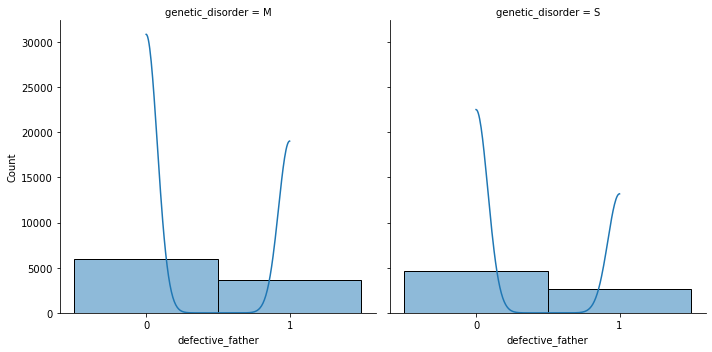

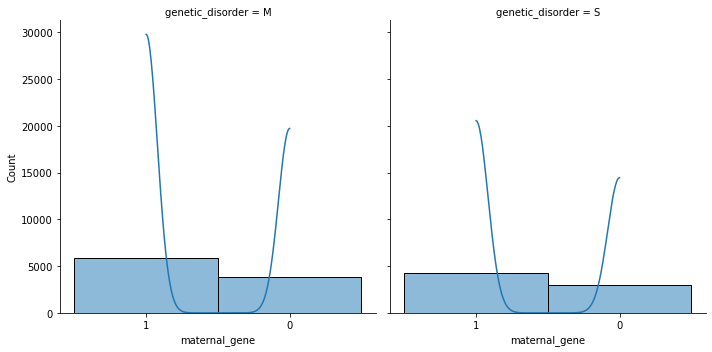

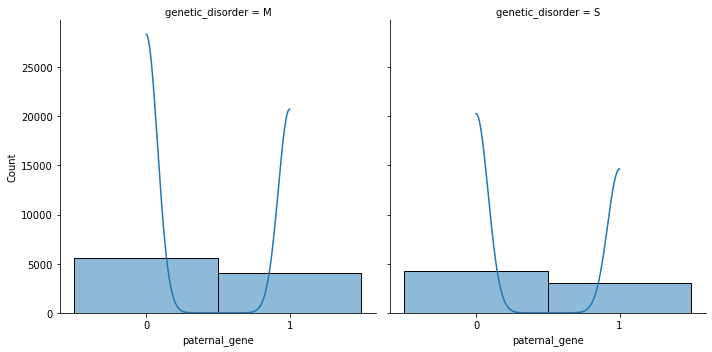

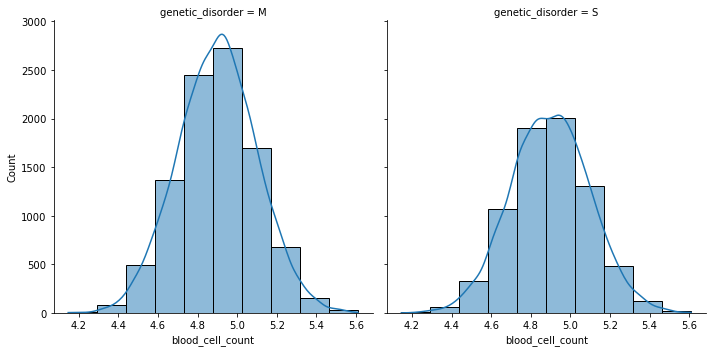

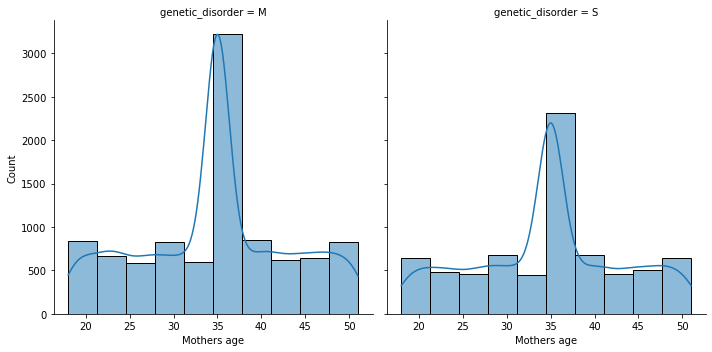

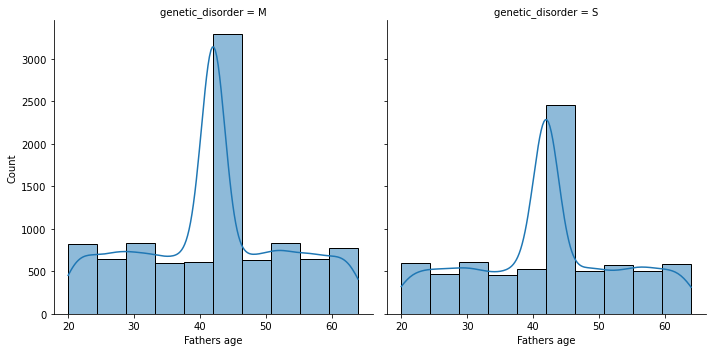

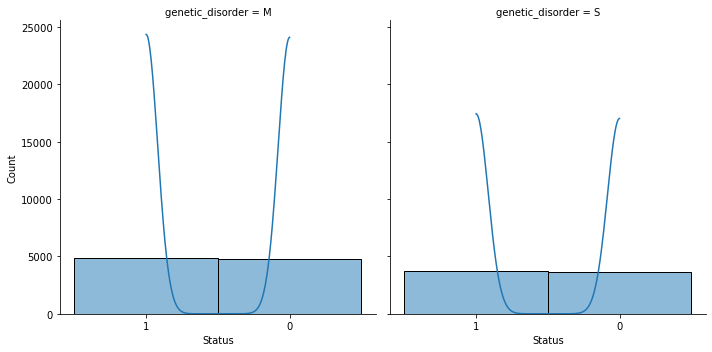

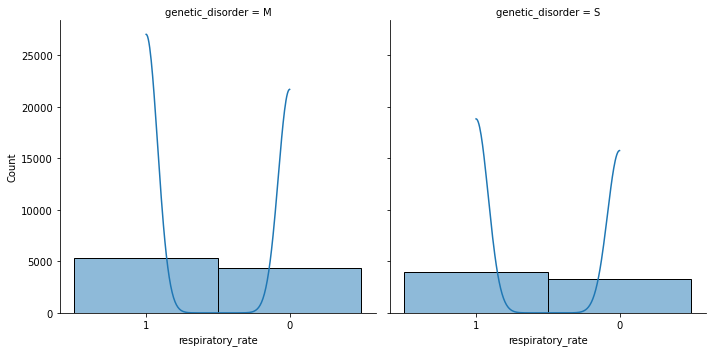

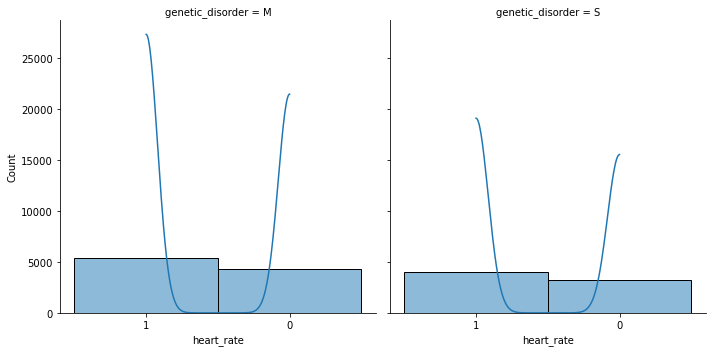

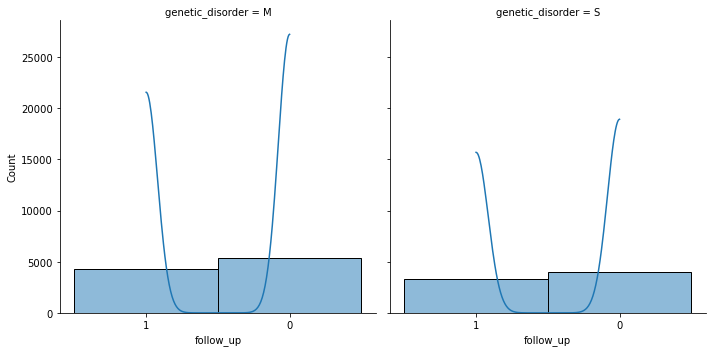

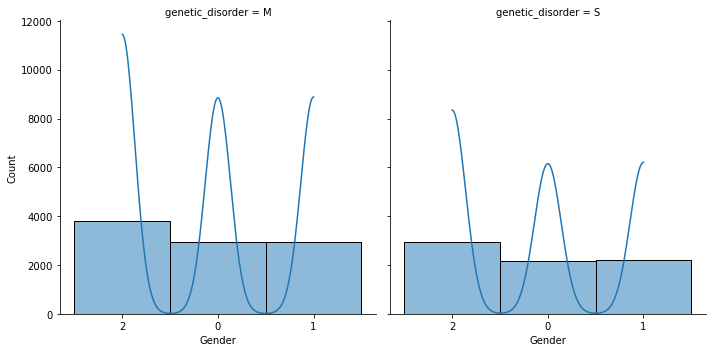

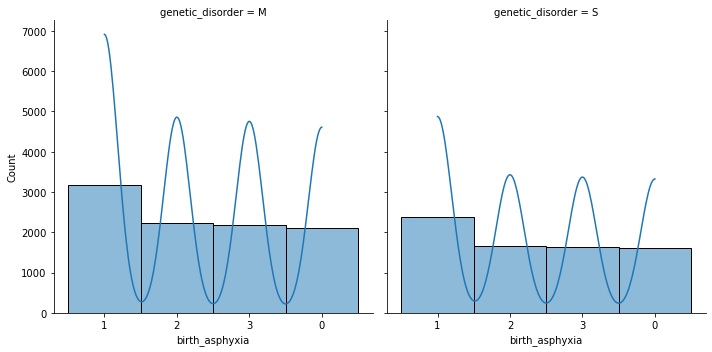

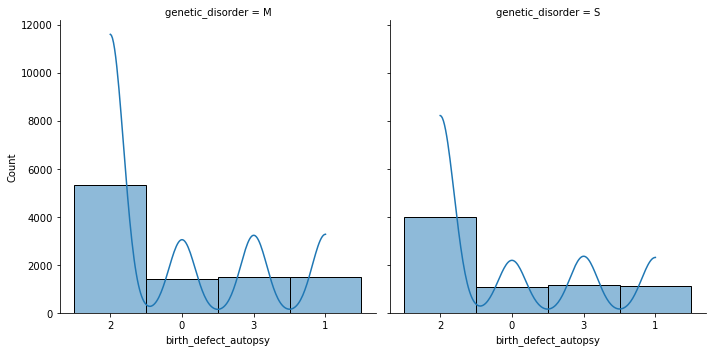

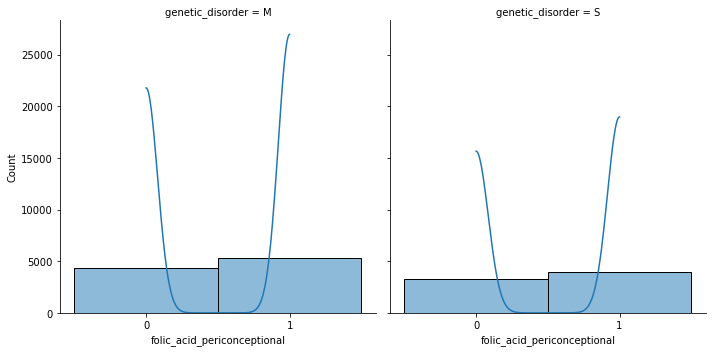

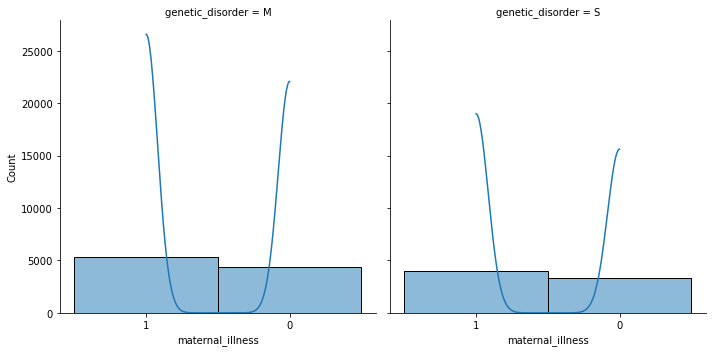

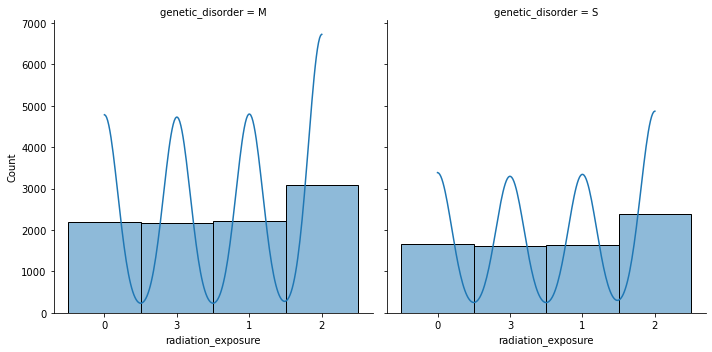

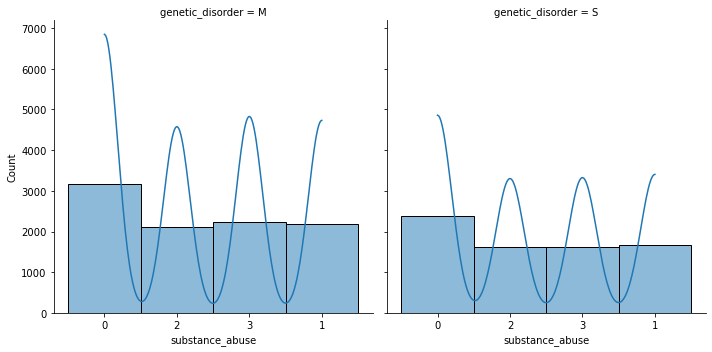

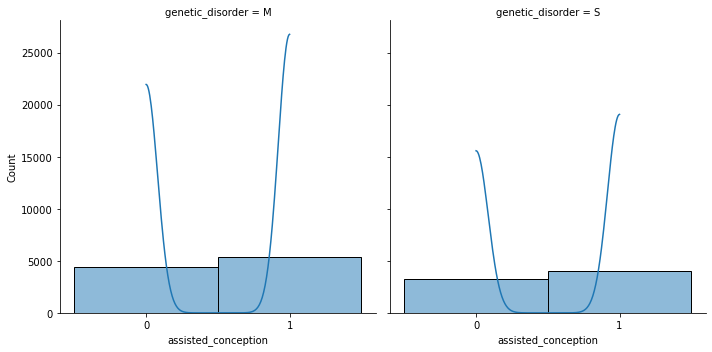

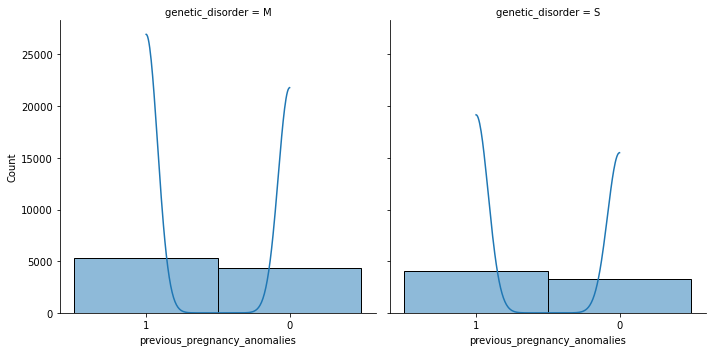

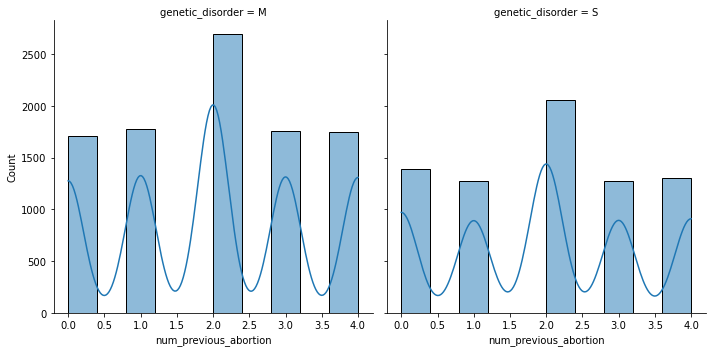

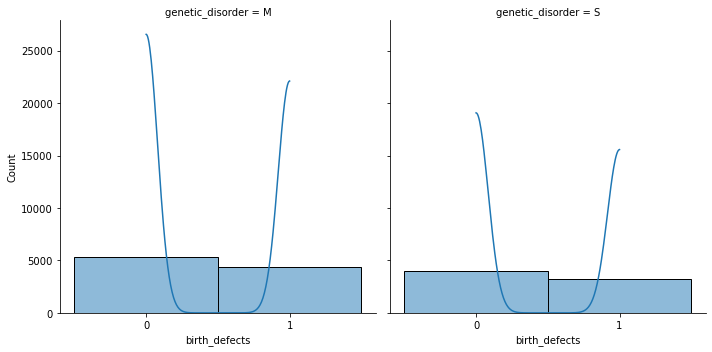

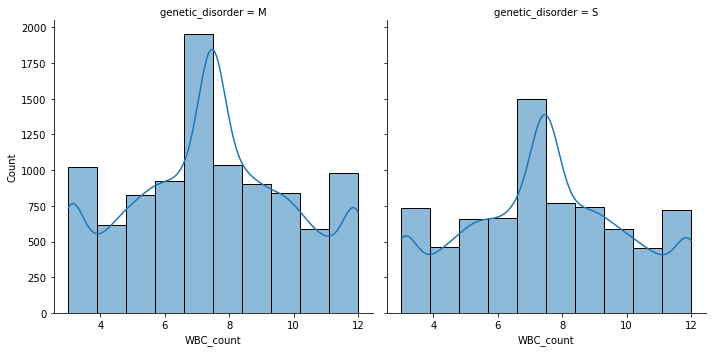

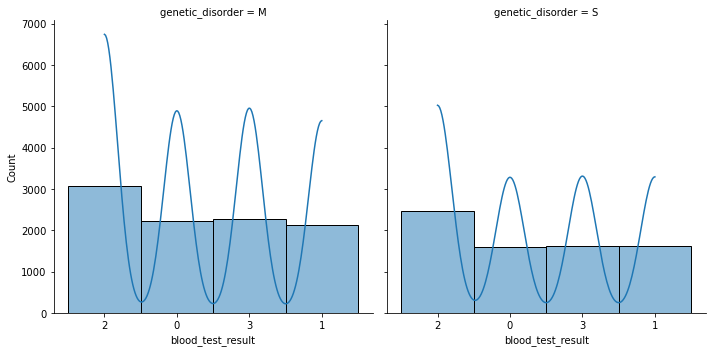

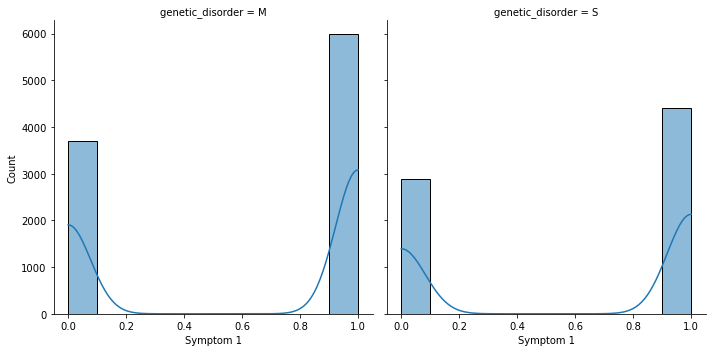

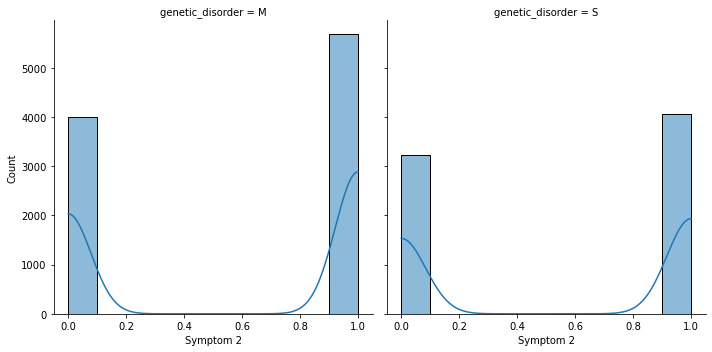

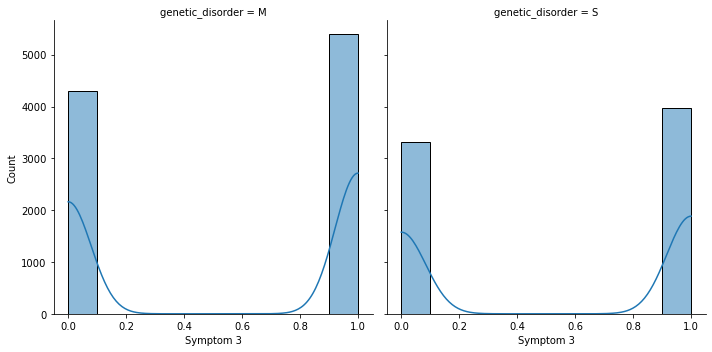

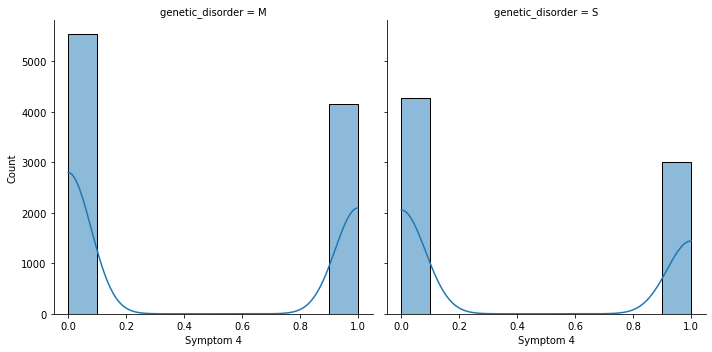

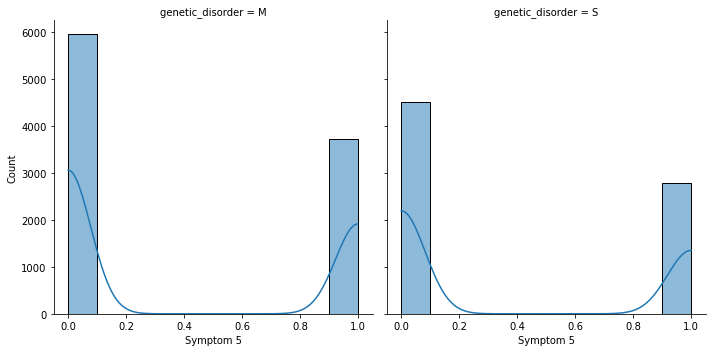

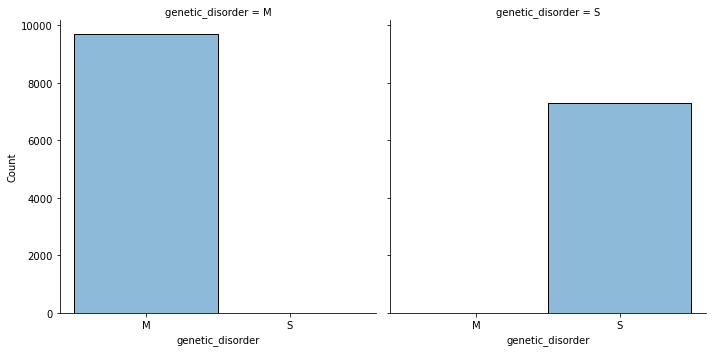

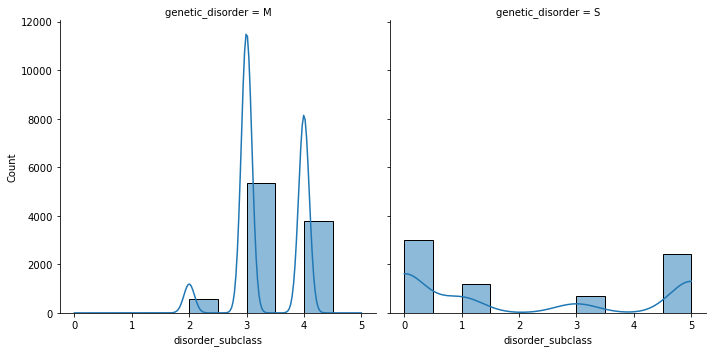

In [26]:
for x in data.columns[2:len(data.columns)]:
    sns.displot(data=data, x=x, col='genetic_disorder', kde=True, bins=10)

# División en train y test¶
En primer lugar, vamos a separar el conjunto de datos original que se encuentra en data en: X, un dataframe con las variables predictoras, e Y, un dataframe con la variable objetivo (la columna diagnosis). A la hora de crear X, también eliminamos la variable id puesto que no debe utilizarse para clasificación.

In [27]:
print('Tamaño del dataset (muestras x variables):', data.shape) # hacer idea de como va la vaína pt 2

X = data.iloc[:,:-2]
Y = pd.DataFrame(data['genetic_disorder'])
Y2 = pd.DataFrame(data['disorder_subclass'])

print(X.head())
print(Y.head())
print(Y2.head())

Tamaño del dataset (muestras x variables): (16977, 32)
   patient_age Genes in mothers side defective_father maternal_gene  \
0          2.0                     1                0             1   
3         12.0                     1                0             1   
5         14.0                     1                0             1   
6          3.0                     1                0             1   
7          3.0                     0                0             1   

  paternal_gene  blood_cell_count  Mothers age  Fathers age Status  \
0             0          4.760603         35.0         42.0      1   
3             0          4.705280         21.0         42.0      0   
5             0          5.103188         35.0         42.0      0   
6             1          4.901080         35.0         63.0      1   
7             1          4.964816         40.0         42.0      1   

  respiratory_rate  ... previous_pregnancy_anomalies num_previous_abortion  \
0                1 

In [28]:
# for trainset 1
from sklearn.model_selection import train_test_split # mirar

random_state = 1998 # fijo semilla para reproducibilidad

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.3, # 30% para test
    stratify=Y, # estratificar para respetar distribución e integridad
    random_state=random_state # dar semilla
)

In [29]:
# for trainset 2 (predicción de subtipos)
from sklearn.model_selection import train_test_split # mirar

random_state = 1998 # fijo semilla para reproducibilidad

X_train, X_test, Y2_train, Y2_test = train_test_split(
    X, Y2,
    test_size=0.3, # 30% para test
    stratify=Y2, # estratificar para respetar distribución e integridad
    random_state=random_state # dar semilla
)

In [30]:
X_train.info()
X_train.describe(include = 'all')
X_test.info()

print('Número de muestras por clase:')
print(Y_train['genetic_disorder'].value_counts())

print('Número de muestras por clase:')
print(Y_test['genetic_disorder'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11883 entries, 14071 to 16939
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   patient_age                   11883 non-null  float64
 1   Genes in mothers side         11883 non-null  object 
 2   defective_father              11883 non-null  object 
 3   maternal_gene                 11883 non-null  object 
 4   paternal_gene                 11883 non-null  object 
 5   blood_cell_count              11883 non-null  float64
 6   Mothers age                   11883 non-null  float64
 7   Fathers age                   11883 non-null  float64
 8   Status                        11883 non-null  object 
 9   respiratory_rate              11883 non-null  object 
 10  heart_rate                    11883 non-null  object 
 11  follow_up                     11883 non-null  object 
 12  Gender                        11883 non-null  object 
 1

In [31]:
data.describe()

,patient_age,blood_cell_count,Mothers age,Fathers age,num_previous_abortion,WBC_count,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,disorder_subclass
count,16977.000000,16977.000000,16977.000000,16977.000000,16977.000000,16977.000000,16977.000000,16977.000000,16977.000000,16977.000000,16977.000000,16977.000000
mean,6.986040,4.899545,34.664369,41.949991,1.994051,7.474435,0.612181,0.574248,0.551511,0.421453,0.383283,2.811333
std,4.178296,0.199362,8.444347,11.198641,1.344089,2.510735,0.487267,0.494471,0.497354,0.493806,0.486201,1.628430
min,0.000000,4.146230,18.000000,20.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,4.763505,29.000000,35.000000,1.000000,5.659942,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7.000000,4.901045,35.000000,42.000000,2.000000,7.466687,1.000000,1.000000,1.000000,0.000000,0.000000,3.000000
75%,11.000000,5.033976,40.000000,49.000000,3.000000,9.255902,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000
max,14.000000,5.609829,51.000000,64.000000,4.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


In [32]:
# Sin escalado KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics # metricas de uso

knn = KNeighborsClassifier()
# Use  Y_train.values.ravel() to avoid a warning
knn.fit(X_train, Y_train.values.ravel())

KNeighborsClassifier()

In [33]:
knn_prediction = knn.predict(X_test)
print('kNN predictions on the test set:', knn_prediction)
print('kNN accuracy = {:0.3f}'.format(metrics.accuracy_score(Y_test, knn_prediction))) # predicciones v muestras
# {} da params para formatabs

kNN predictions on the test set: ['M' 'S' 'S' ... 'M' 'S' 'M']
kNN accuracy = 0.512


In [34]:
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, Y_train.values.ravel())

knn_prediction = knn.predict(X_test)
print('kNN accuracy = {:0.3f}'.format(metrics.accuracy_score(Y_test, knn_prediction)))
print('kNN predictions on the test set:', knn_prediction)

kNN accuracy = 0.512
kNN predictions on the test set: ['M' 'S' 'S' ... 'M' 'S' 'M']


In [35]:
knn = KNeighborsClassifier(n_neighbors = 1000, weights = 'distance')

knn.fit(X_train, Y_train.values.ravel())

knn_prediction = knn.predict(X_test)
print('kNN accuracy = {:0.3f}'.format(metrics.accuracy_score(Y_test, knn_prediction)))

kNN accuracy = 0.570


In [36]:
# Con escalado KNN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = scaler.transform(X_test)

display(X_train_scaled.describe())

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,1.188300e+04,1.188300e+04,1.188300e+04,1.188300e+04,1.188300e+04,1.188300e+04,1.188300e+04,1.188300e+04,1.188300e+04,1.188300e+04,...,1.188300e+04,1.188300e+04,1.188300e+04,1.188300e+04,1.188300e+04,1.188300e+04,1.188300e+04,1.188300e+04,1.188300e+04,1.188300e+04
mean,1.112185e-16,-1.076308e-17,1.793847e-17,-3.587694e-18,1.674257e-17,2.397775e-16,2.529324e-16,-2.212411e-16,-1.793847e-17,5.501130e-17,...,8.909439e-17,5.889797e-17,-3.288719e-17,1.258683e-16,4.499566e-17,3.034591e-17,-4.379976e-17,8.371285e-17,-6.218669e-17,5.979489e-18
std,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,...,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00
min,-1.656991e+00,-1.167834e+00,-7.762489e-01,-1.212421e+00,-8.549585e-01,-3.752733e+00,-1.965490e+00,-1.963441e+00,-1.006332e+00,-1.107489e+00,...,-1.111831e+00,-1.484433e+00,-9.140546e-01,-1.786846e+00,-1.443350e+00,-1.261631e+00,-1.164618e+00,-1.106360e+00,-8.554010e-01,-7.842046e-01
25%,-9.395205e-01,-1.167834e+00,-7.762489e-01,-1.212421e+00,-8.549585e-01,-6.856008e-01,-6.658519e-01,-7.119439e-01,-1.006332e+00,-1.107489e+00,...,-1.111831e+00,-7.413410e-01,-9.140546e-01,-7.247233e-01,-5.140914e-01,-1.261631e+00,-1.164618e+00,-1.106360e+00,-8.554010e-01,-7.842046e-01
50%,1.710707e-02,8.562864e-01,-7.762489e-01,8.247960e-01,-8.549585e-01,1.317470e-02,4.304190e-02,3.197162e-03,9.937083e-01,9.029436e-01,...,8.994171e-01,1.750953e-03,-9.140546e-01,-3.522118e-03,4.151675e-01,7.926250e-01,8.586505e-01,9.038653e-01,-8.554010e-01,-7.842046e-01
75%,7.345778e-01,8.562864e-01,1.288247e+00,8.247960e-01,1.169647e+00,6.689529e-01,6.337867e-01,6.289456e-01,9.937083e-01,9.029436e-01,...,8.994171e-01,7.448429e-01,1.094027e+00,7.082814e-01,4.151675e-01,7.926250e-01,8.586505e-01,9.038653e-01,1.169042e+00,1.275177e+00
max,1.691205e+00,8.562864e-01,1.288247e+00,8.247960e-01,1.169647e+00,3.540041e+00,1.933425e+00,1.969835e+00,9.937083e-01,9.029436e-01,...,8.994171e-01,1.487935e+00,1.094027e+00,1.806402e+00,1.344426e+00,7.926250e-01,8.586505e-01,9.038653e-01,1.169042e+00,1.275177e+00


In [37]:
knn_scaled = KNeighborsClassifier()
knn_scaled.fit(X_train_scaled, Y_train.values.ravel())

knn_prediction_scaled = knn_scaled.predict(X_test_scaled)
print('kNN accuracy (with scaled data) = {:0.3f}'.format(metrics.accuracy_score(Y_test, knn_prediction_scaled)))

kNN accuracy (with scaled data) = 0.523


# Decision Tree
Ahora vamos a entrenar y evaluar un árbol de decisión, disponible en sklearn en DecisionTreeClassifier (https://scikit-learn.org/0.24/modules/generated/sklearn.tree.DecisionTreeClassifier.html). Utilizamos random_state para obtener siempre el mismo resultado. 

In [155]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = random_state, min_samples_leaf = 50)
dt.fit(X_train, Y_train)

dt_prediction = dt.predict(X_test)
print('Decision Tree accuracy (test) = {:0.3f}'.format(metrics.accuracy_score(Y_test, dt_prediction)))

Decision Tree accuracy (test) = 0.524


In [156]:
from sklearn import tree

text_representation = tree.export_text(dt, feature_names = data.columns.drop(['genetic_disorder', 'disorder_subclass']).tolist())
print(text_representation)

|--- blood_cell_count <= 5.36
|   |--- blood_cell_count <= 5.12
|   |   |--- blood_cell_count <= 5.10
|   |   |   |--- birth_defect_autopsy <= 1.50
|   |   |   |   |--- WBC_count <= 3.13
|   |   |   |   |   |--- Symptom 2 <= 0.50
|   |   |   |   |   |   |--- class: S
|   |   |   |   |   |--- Symptom 2 >  0.50
|   |   |   |   |   |   |--- blood_cell_count <= 4.88
|   |   |   |   |   |   |   |--- class: M
|   |   |   |   |   |   |--- blood_cell_count >  4.88
|   |   |   |   |   |   |   |--- class: S
|   |   |   |   |--- WBC_count >  3.13
|   |   |   |   |   |--- blood_cell_count <= 4.60
|   |   |   |   |   |   |--- Symptom 1 <= 0.50
|   |   |   |   |   |   |   |--- class: M
|   |   |   |   |   |   |--- Symptom 1 >  0.50
|   |   |   |   |   |   |   |--- blood_cell_count <= 4.52
|   |   |   |   |   |   |   |   |--- class: M
|   |   |   |   |   |   |   |--- blood_cell_count >  4.52
|   |   |   |   |   |   |   |   |--- class: S
|   |   |   |   |   |--- blood_cell_count >  4.60
|   |   |   | 

In [157]:
import matplotlib.pyplot as plt # el gini (homgeneidad, el primero es el de los datos q entran)

fig = plt.figure(figsize=(25,20))
feature_names = data.columns.drop(['genetic_disorder', 'disorder_subclass']).tolist()
#_ = tree.plot_tree(dt, feature_names = feature_names, filled = True)

<Figure size 1800x1440 with 0 Axes>

In [158]:
dt_prediction_train = dt.predict(X_train)
print('Decision Tree accuracy = {:0.3f}'.format(metrics.accuracy_score(Y_train, dt_prediction_train)))

Decision Tree accuracy = 0.629


In [159]:
dt = DecisionTreeClassifier(random_state = random_state, min_samples_leaf = 50)
dt.fit(X_train, Y_train)

dt_prediction = dt.predict(X_test)
print('Decision Tree accuracy = {:0.3f}'.format(metrics.accuracy_score(Y_test, dt_prediction)))

dt_prediction_train = dt.predict(X_train)
print('Decision Tree accuracy = {:0.3f}'.format(metrics.accuracy_score(Y_train, dt_prediction_train)))

Decision Tree accuracy = 0.524
Decision Tree accuracy = 0.629


In [162]:
text_representation = tree.export_text(dt, feature_names = data.columns.drop(['genetic_disorder', 'disorder_subclass']).tolist())
print(text_representation)

fig = plt.figure(figsize=(25,20))
feature_names = data.columns.drop(['genetic_disorder', 'disorder_subclass']).tolist()
#_ = tree.plot_tree(dt, feature_names = feature_names, filled = True)

|--- blood_cell_count <= 5.36
|   |--- blood_cell_count <= 5.12
|   |   |--- blood_cell_count <= 5.10
|   |   |   |--- birth_defect_autopsy <= 1.50
|   |   |   |   |--- WBC_count <= 3.13
|   |   |   |   |   |--- Symptom 2 <= 0.50
|   |   |   |   |   |   |--- class: S
|   |   |   |   |   |--- Symptom 2 >  0.50
|   |   |   |   |   |   |--- blood_cell_count <= 4.88
|   |   |   |   |   |   |   |--- class: M
|   |   |   |   |   |   |--- blood_cell_count >  4.88
|   |   |   |   |   |   |   |--- class: S
|   |   |   |   |--- WBC_count >  3.13
|   |   |   |   |   |--- blood_cell_count <= 4.60
|   |   |   |   |   |   |--- Symptom 1 <= 0.50
|   |   |   |   |   |   |   |--- class: M
|   |   |   |   |   |   |--- Symptom 1 >  0.50
|   |   |   |   |   |   |   |--- blood_cell_count <= 4.52
|   |   |   |   |   |   |   |   |--- class: M
|   |   |   |   |   |   |   |--- blood_cell_count >  4.52
|   |   |   |   |   |   |   |   |--- class: S
|   |   |   |   |   |--- blood_cell_count >  4.60
|   |   |   | 

<Figure size 1800x1440 with 0 Axes>

In [163]:
dt_prediction_probabilities = dt.predict_proba(X_test)

# print(dt_prediction_probabilities)

print('Classes in the decision tree model: ', dt.classes_)
print('Predictions for class M:\n', dt_prediction_probabilities[:,1])
print('Predictions for class S:\n', dt_prediction_probabilities[:,1])

Classes in the decision tree model:  ['M' 'S']
Predictions for class M:
 [0.6        0.63793103 0.58064516 ... 0.625      0.34375    0.62666667]
Predictions for class S:
 [0.6        0.63793103 0.58064516 ... 0.625      0.34375    0.62666667]


# La matriz de confusión
Comenzamos construyendo la matriz de confusión tal y como se muestra en la imagen anterior. Para hacer el cálculo, consideramos que los positivos son las muestras de la clase que nos interesa (Malignant) y los negativos las muestras de la otra clase (Benignant).

Para calcular las celdas de la matriz (TP, TN, FP y FN) tenemos que comparar la clasificación real (disponible en Y_test) con las predicciones del clasificador (por ejemplo dt_prediction en el ejemplo anterior). Repetimos aquí el ejemplo para mostrar los dos arrays y calcular la tasa de aciertos (fíjate el el efecto del parámetro normalize):

In [164]:
dt = DecisionTreeClassifier(random_state = random_state, min_samples_leaf = 50)
dt.fit(X_train, Y_train)
dt_prediction_train = dt.predict(X_test)

print('Clasificación real:\n', np.asarray(Y_test['genetic_disorder']))
print('\nPredicciones:\n', dt_prediction_train)
print('\nDecision Tree accuracy = {} ({:.03f})'.format(
    metrics.accuracy_score(Y_test, dt_prediction_train, normalize = False),
    metrics.accuracy_score(Y_test, dt_prediction_train, normalize = True)
))

Clasificación real:
 ['S' 'M' 'M' ... 'M' 'S' 'M']

Predicciones:
 ['S' 'S' 'S' ... 'S' 'M' 'S']

Decision Tree accuracy = 2669 (0.524)


In [165]:
pred_y = (dt_prediction == "S").astype(int)
true_y = np.transpose(np.asarray(Y_test[['genetic_disorder']]) == "S").astype(int).flatten()

print('Decision Tree accuracy = ', metrics.accuracy_score(true_y, pred_y))

Decision Tree accuracy =  0.5239497447978013


In [166]:
display(metrics.confusion_matrix(Y_test, dt_prediction))

array([[1981,  925],
       [1500,  688]])

In [167]:
from sklearn import metrics

cm_sklearn = metrics.confusion_matrix(Y_test, dt_prediction)


display(cm_sklearn)

array([[1981,  925],
       [1500,  688]])

In [168]:
## cuando tengo una matriz de confusion hecha, con la funcion ravel obtengo una tupla.

tp, fn, fp, tn = cm_sklearn.ravel()

print("TP = ", tp)
print("TN = ", tn)
print("FP = ", fp)
print("FN = ", fn)

TP =  1981
TN =  688
FP =  1500
FN =  925


# Metrica calidad

In [169]:
accuracy = (tp + tn) / (tp + fp + fn + tn)

display(accuracy)

0.5239497447978013

In [170]:
## Ejercicio: calcula las métricas recall (sensitivity), specificity, precision (PPV) y NPV utilizando los valores calculados anteriormente.

recall = tp / (tp + fn)
print("Recall = {:.3f}".format(recall))

specificity = tn / (tn + fp)
print("Specificity = {:.3f}".format(specificity))

precision = tp / (tp + fp)
print("Precision (PPV) = {:.3f}".format(precision))

npv = tn / (tn + fn)
print("NPV = {:.3f}".format(npv))

Recall = 0.682
Specificity = 0.314
Precision (PPV) = 0.569
NPV = 0.427


In [171]:
recall = tp / (tp + fn)
print("Recall = {:.3f}".format(recall))

specificity = tn / (tn + fp)
print("Specificity = {:.3f}".format(specificity))

precision = tp / (tp + fp)
print("Precision (PPV) = {:.3f}".format(precision))

npv = tn / (tn + fn)
print("NPV = {:.3f}".format(npv))

print(metrics.classification_report(Y_test, dt_prediction, digits = 3))

## sensibilidad y recall hacen referencia a la clase positiva(a lo que queremos identificar)
## cuando demos f1 de la clase positiva. tener en cuenta el balance entre sesibilidad y ppv.


Recall = 0.682
Specificity = 0.314
Precision (PPV) = 0.569
NPV = 0.427
              precision    recall  f1-score   support

           M      0.569     0.682     0.620      2906
           S      0.427     0.314     0.362      2188

    accuracy                          0.524      5094
   macro avg      0.498     0.498     0.491      5094
weighted avg      0.508     0.524     0.509      5094



# Cross validation score

In [172]:
from sklearn.model_selection import cross_val_score

dt_cv = DecisionTreeClassifier(random_state = random_state, min_samples_leaf = 50)

accuracies = cross_val_score(dt_cv, X, Y, cv=5, scoring="accuracy")
print(accuracies)

[0.60924617 0.60335689 0.61826215 0.60736377 0.61089838]


In [173]:
from sklearn import preprocessing

lb = preprocessing.LabelBinarizer()

lb.fit(["M", "S"])

display(lb.classes_)


array(['M', 'S'], dtype='<U1')

In [174]:
Y_binary = lb.transform(Y)

precisions = cross_val_score(dt_cv, X, Y_binary, cv=5, scoring="precision")
precisions

array([0.55527426, 0.54487179, 0.57193606, 0.55526083, 0.5638397 ])

# Cross_value

In [175]:
# from sklearn.model_selection import cross_validate

scoring = ['accuracy', 'recall', 'precision']

dt_cv = DecisionTreeClassifier(random_state = random_state, min_samples_leaf = 50)
cross_validate_scores = cross_validate(dt_cv, X, Y_binary, cv=5, scoring=scoring)

display(sorted(cross_validate_scores.keys()))

print("Accuracy: ", cross_validate_scores['test_accuracy'])
print("Precision: ", cross_validate_scores['test_precision'])
print("Recall: ", cross_validate_scores['test_recall'])

['fit_time', 'score_time', 'test_accuracy', 'test_precision', 'test_recall']

Accuracy:  [0.60924617 0.60335689 0.61826215 0.60736377 0.61089838]
Precision:  [0.55527426 0.54487179 0.57193606 0.55526083 0.5638397 ]
Recall:  [0.45130316 0.46607265 0.44170096 0.43072702 0.41495199]


In [176]:
from sklearn.model_selection import cross_validate

scoring = ['accuracy', 'recall', 'precision']

dt_cv = DecisionTreeClassifier(random_state = random_state, min_samples_leaf = 100)
cross_validate_scores = cross_validate(dt_cv, X, Y_binary, cv=5, scoring=scoring)

display(sorted(cross_validate_scores.keys()))

print("Accuracy: ", cross_validate_scores['test_accuracy'])
print("Precision: ", cross_validate_scores['test_precision'])
print("Recall: ", cross_validate_scores['test_recall'])

['fit_time', 'score_time', 'test_accuracy', 'test_precision', 'test_recall']

Accuracy:  [0.62249706 0.61660777 0.62621502 0.61119293 0.61472754]
Precision:  [0.59090909 0.56953056 0.5907781  0.5629562  0.5711575 ]
Recall:  [0.39231824 0.44071282 0.4218107  0.42318244 0.41289438]


# Escalado y validacion cruzada

In [177]:
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    preprocessing.StandardScaler(),
    DecisionTreeClassifier(random_state = random_state, min_samples_leaf = 20)
)

cross_validate_scores = cross_validate(pipeline, X, Y_binary, cv=5, scoring=scoring)

display(sorted(cross_validate_scores.keys()))

print("Accuracy: ", cross_validate_scores['test_accuracy'])
print("Precision: ", cross_validate_scores['test_precision'])
print("Recall: ", cross_validate_scores['test_recall'])

['fit_time', 'score_time', 'test_accuracy', 'test_precision', 'test_recall']

Accuracy:  [0.58215548 0.58804476 0.6017673  0.59057437 0.58409426]
Precision:  [0.51563753 0.52325581 0.53967066 0.52672956 0.51808176]
Recall:  [0.44101509 0.46264565 0.49451303 0.45953361 0.45198903]


# Curvas Roc

In [187]:
from sklearn.metrics import RocCurveDisplay

roc_curve = metrics.plot_roc_curve(dt, X_test, Y_test)

AttributeError: module 'sklearn.metrics' has no attribute 'plot_roc_curve'

# Hiperparametros

In [183]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

parameters = {
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [2, 4, 6, 8, 10, 20, 50, 100],
    'max_depth': [3, 5, 8, 12, 16, 20, 50, 100]
}

dt = DecisionTreeClassifier(random_state = random_state)

grid_search = GridSearchCV(dt, parameters, scoring = 'accuracy')

grid_search.fit(X_train, Y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=1998),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 8, 12, 16, 20, 50, 100],
                         'min_samples_leaf': [2, 4, 6, 8, 10, 20, 50, 100]},
             scoring='accuracy')

In [184]:
print("La mejor de combinación de parámetros es:", grid_search.best_params_)

print("\nY su rendimiento es:", grid_search.best_score_)

La mejor de combinación de parámetros es: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4}

Y su rendimiento es: 0.5693849517471732


In [185]:
dt_prediction_gscv = grid_search.predict(X_test)
print('Best Decision Tree accuracy = ', metrics.accuracy_score(dt_prediction_gscv, Y_test))

Best Decision Tree accuracy =  0.5702787593246957


# Curvas de aprendizaje

Learning curves on this training size proportions of the available data:  [0.2        0.25714286 0.31428571 0.37142857 0.42857143 0.48571429
 0.54285714 0.6        0.65714286 0.71428571 0.77142857 0.82857143
 0.88571429 0.94285714 1.        ]


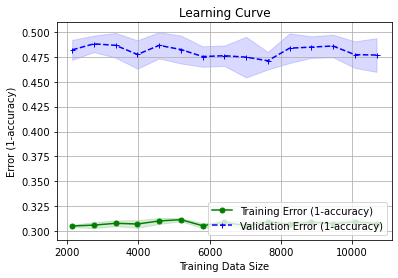

In [186]:
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier

estimator = DecisionTreeClassifier(random_state = random_state, min_samples_leaf = 20)

train_sizes = np.linspace(0.2, 1.0, 15)
print('Learning curves on this training size proportions of the available data: ', train_sizes)

train_sizes, train_scores, test_scores = learning_curve(
    estimator = estimator, X = X_train, y = Y_train, cv = 10, train_sizes = train_sizes, n_jobs=1
)

def plot_learning_curve(train_sizes, train_scores, test_scores):
    import matplotlib.pyplot as plt

    # Calculate training and test mean and std
    train_scores = 1-train_scores
    test_scores = 1-test_scores

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    # Plot the learning curve

    plt.plot(train_sizes, train_mean, color='green', marker='o', markersize=5, label='Training Error (1-accuracy)')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='green')
    plt.plot(train_sizes, test_mean, color='blue', marker='+', markersize=5, linestyle='--', label='Validation Error (1-accuracy)')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='blue')
    plt.title('Learning Curve')
    plt.xlabel('Training Data Size')
    plt.ylabel('Error (1-accuracy)')
    plt.grid()
    plt.legend(loc='lower right')

plot_learning_curve(train_sizes, train_scores, test_scores)